In [1]:
# PCA
# N개의 M차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가짐 -> 특정한 규칙에 의해
# 이러한 데이터 간의 변이 규칙을 찾아낼 때 PCA를 이용할 수 있음

# 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 것

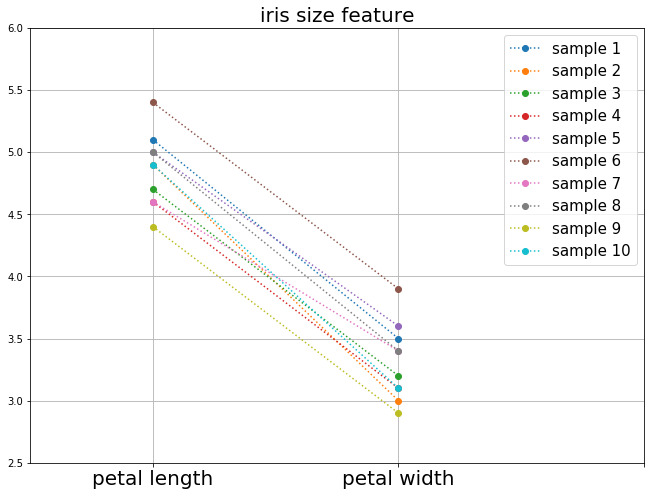

In [13]:
# 예제 1) 붓꽃 데이터의 차원 축소

# A) 붓꽃 데이터 중에서 10송이의 데이터만 선택해서 꽃받침 길이와 꽃받침 폭 데이터 그래프 시각화

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
N = 10
X = iris.data[:N, :2]

plt.figure(figsize=(11, 8))
plt.plot(X.T, 'o:')
plt.xticks(range(4), ['petal length', 'petal width'], fontsize=20)
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title('iris size feature', fontsize=20)
plt.grid(True)
plt.legend(['sample {}'.format(i+1) for i in range(N)], fontsize=15)

plt.show()

In [14]:
# 위 그래프에서 꽃받침의 길이가 크면 꽃받침의 폭도 같이 커짐을 알 수 있음

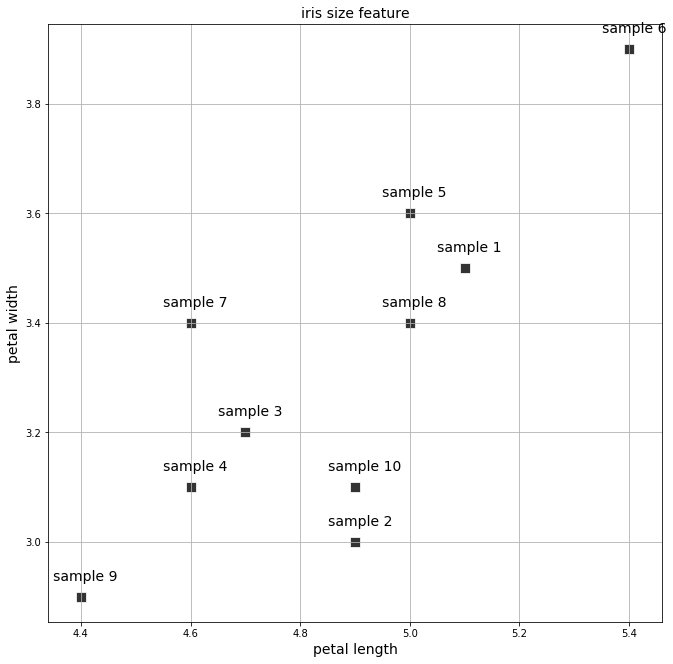

In [20]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(11, 11))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "sample {}".format(i+1), fontsize=14)
    
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("iris size feature", fontsize=14)
plt.axis("equal")
plt.grid(True)
plt.show()

In [22]:
# 위 그래프를 통해 꽃받침의 길이가 크면 꽃받침의 폭도 같이 커진다는 규칙을 알 수 있음

# 꽃받침의 길이가 크면 꽃받침 폭도 커지며 그 비율은 거의 일정한데, 그 이유는 (꽃받침 길이, 꽃받침 폭)이라는
# 2차원 측정 데이터는 사실 "꽃의 크기"라는 근본적인 데이터가 두 개의 다른 형태로 표현된 것에 지나지 않기 때문이다.
# 바로 측정되지는 않지만 측정된 데이터의 기저에 숨어서 측정 데이터를 결정짓는 데이터를 '잠재변수'라 한다.

# PCA에서는 잠재변수와 측정 데이터가 선형적인 관계로 연결되어 있다고 가정한다.

In [23]:
# 차원축소문제는 다차원 벡터를 더 낮은 벡터공간에 투영하면서 로우-랭크 근사 문제가 된다.
# N개의 데이터를 1차원 직선에 투영하는 문제라고 하면 원점을 지나는 직선을 찾는게 아니라 
# 원점이 아닌 어떤 점 x0를 지나는 직선을 찾는 문제

# PCA의 목표는 변환 결과인 차원축소 벡터 x'i의 정보가 원래의 벡터 xi가 가졌던 정보와 가장 유사하게 되는
# 변환행렬 W값을 찾는 것이다.

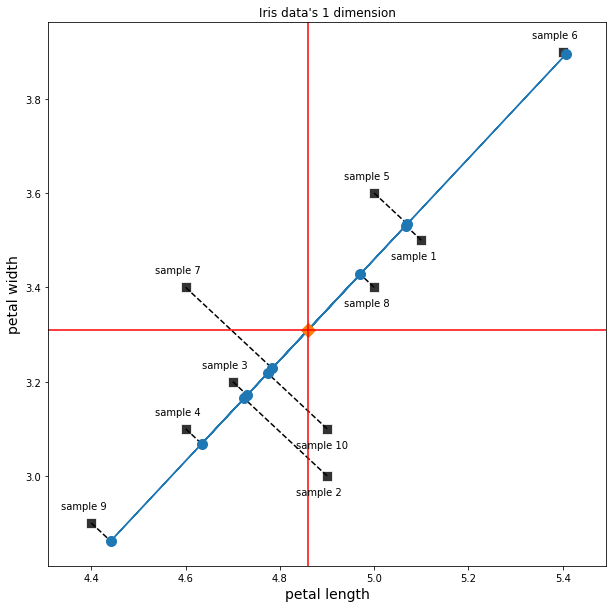

In [24]:
# 붓꽃 데이터를 1차원으로 차원 축소
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X) # 1차원 근사 데이터 집합
X2 = pca1.inverse_transform(X_low) # 다시 2차원으로 복귀한 근사 데이터 집합(정보의 손실)

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i+1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
    
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")

plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(False)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)

plt.title("Iris data's 1 dimension")
plt.axis("equal")
plt.show()

In [26]:
# PCA의 평균값
pca1.mean_

array([4.86, 3.31])

In [27]:
# PCA의 단위기저벡터
pca1.components_

array([[0.68305029, 0.73037134]])

In [29]:
# 위의 값은 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는)
# 고유벡터이다.

# 넘파이로 구한 첫 번째 오른쪽 특이벡터
import numpy as np

X0 = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X0)

Vt

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [30]:
Vt[:, 0]

array([-0.68305029, -0.73037134])

In [31]:
# 고윳값 분해
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [32]:
W

array([0.17107711, 1.44192289])

In [33]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [34]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

In [35]:
# 8번째 꽃받침 길이와 꽃받침 폭
X[7, :]

array([5. , 3.4])

In [36]:
# PCA로 구한 주성분의 값 즉, 꽃의 크기
X_low[7]

array([0.16136046])

In [37]:
# 이 주성분값을 이용하여 다시 2차원 값으로 나타낸 근사값
X2[7, :]

array([4.97021731, 3.42785306])

In [38]:
# B) 붓꽃 데이터 중에서 50송이의 데이터(setosa)만 선택해서 꽃잎의 길이와 꽃잎의 폭을 이용하여
#    1차원 PCA를 수행하라. 꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형 조합으로 나타나는가?

In [74]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

N = 50
X = iris.data[:, (2, 3)]
y = iris.target
print(X)
# setosa = (y == 0)
# X = X[setosa]
# y = y[setosa]



# iris = load_iris()
# N = 50

# X = iris.data[:N, (2, 3)]
# y = iris.target

# iris_setosa = (y == 0) # setosa만 선택

# X = X[iris_setosa]
# y = y[iris_setosa]

# print(y)

# plt.figure(figsize=(11, 10))
# plt.plot(X.T, 'o:')
# plt.xticks(range(4), ['petal length', 'petal width'], fontsize=20)
# plt.xlim(-0.5, 2)
# plt.ylim(2.5, 6)
# plt.title('iris size feature', fontsize=20)
# plt.grid(True)
# plt.legend(['sample {}'.format(i+1) for i in range(N)], fontsize=5)

# plt.show()

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca_reduced = pca.fit_transform(X)
X_pca_inverse_reduced =  pca.inverse_transform(X_pca_reduced)

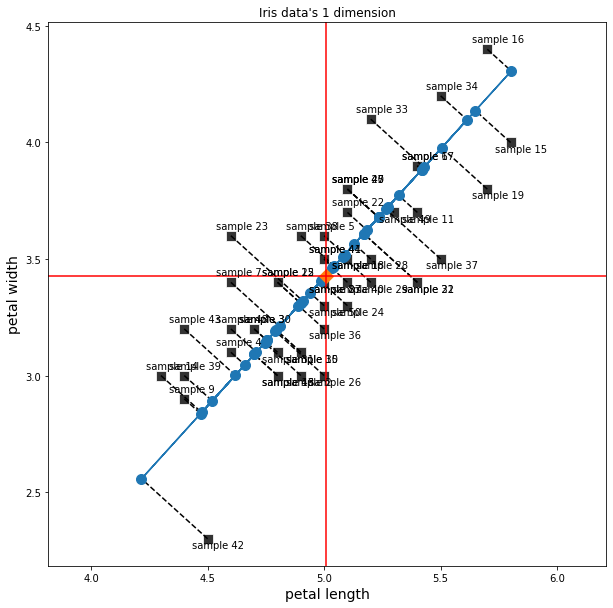

In [51]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    d = 0.03 if X[i, 1] > X_pca_inverse_reduced[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i+1))
    plt.plot([X[i, 0], X_pca_inverse_reduced[i, 0]], [X[i, 1], X_pca_inverse_reduced[i, 1]], "k--")
    
plt.plot(X2[:, 0], X_pca_inverse_reduced[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")

plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(False)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)

plt.title("Iris data's 1 dimension")
plt.axis("equal")
plt.show()

In [52]:
# 산점도와 색깔이 있는 숫자를 쓰기 위해 plot_digits() 함수
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1 사이로 만듭니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 그릴 숫자의 좌표 목록을 만듭니다.
    # 반복문 아래에서 `if` 문장을 쓰지 않기 위해 시작할 때 이미 그래프가 그려져 있다고 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 이해하기 쉽습니다.
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [ ]:
plot_digits(X_pca_reduced, y, images=X, figsize=(35, 25))

In [ ]:
# C) 붓꽃 데이터 중에서 50송이의 데이터(setosa)만 선택해서 꽃잎의 길이와 폭, 꽃받침의 길이와 폭, 
#    이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형 조합으로 나타나는가?